# KNN Estimator for Banking Segment 

On the mostly of the banks the clients are segmented in categories. This classification is made by looking into a amount of demographic data. We need to develop a model to, given the demographic data of one client, the model should determinate what segment this client is more fit in.

# The dataset


This dataset is from Kaggle. We can access here on this [link](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)





# Importing libreries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/home/dataset/BankChurners.csv')
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


On the dataset page on Kaggle we have a description of all the columns on the data set. As you can see here:

1. **CLIENTNUM:** Unique identifier for each customer. (Integer)
2. **Attrition_Flag:**	Flag indicating whether or not the customer has churned out. (Boolean)
3. **Customer_Age:**	Age of customer. (Integer)
4. **Gender:**	Gender of customer. (String)
5. **Dependent_count:**	Number of dependents that customer has. (Integer)
6. **Education_Level:**	Education level of customer. (String)
7. **Marital_Status:**	Marital status of customer. (String)
8. **Income_Category:**	Income category of customer. (String)
9. **Card_Category:**	Type of card held by customer. (String)
10. **Months_on_book:**	How long customer has been on the books. (Integer)
11. **Total_Relationship_Count:**	Total number of relationships customer has with the credit card provider. (Integer)
12. **Months_Inactive_12_mon:**	Number of months customer has been inactive in the last twelve months. (Integer)
13. **Contacts_Count_12_mon:**	Number of contacts customer has had in the last twelve months. (Integer)
14. **Credit_Limit:**	Credit limit of customer. (Integer)
15. **Total_Revolving_Bal:**	Total revolving balance of customer. (Integer)
16. **Avg_Open_To_Buy:**	Average open to buy ratio of customer. (Integer)
17. **Total_Amt_Chng_Q4_Q1:**	Total amount changed from quarter 4 to quarter 1. (Integer)
18. **Total_Trans_Amt:**	Total transaction amount. (Integer)
19. **Total_Trans_Ct:**	Total transaction count. (Integer)
20. **Total_Ct_Chng_Q4_Q1:**	Total count changed from quarter 4 to quarter 1. (Integer)
21. **Avg_Utilization_Ratio:**	Average utilization ratio of customer. (Integer)
22.Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:	Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

Initially, I want to padronize the name of the columns and drop the columns we are not using on this analysis.  

In [ ]:
maping = {
    'CLIENTNUM': 'Customer_Id',
    'Gender': 'Customer_Gender',
    'Dependent_count': 'Dependent_Count',
    'Month_on_book': 'Monht_on_Book',
}

columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Total_Amt_Chng_Q4_Q1', 
                   'Total_Ct_Chng_Q4_Q1'
                   ]


dataset.rename(columns = maping, inplace = True)
dataset.drop(columns = columns_to_drop, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


# Exploring the dataset

Now we have padronized the name of the columns e droped out the columns we don't want to use, we will take a deeper look into the variables we have to work. Mainly the 'Card_Category', with is our target variable

There is a lot of interesting things to look on all the variables here. But we will foccus on looking for

1. Cleanig the dataset
2. Try to understand how the other categories are distributed by card segment

## Card Segment

As the Card Segment is our target, we start by having a deeper look into this variable. We will first describe this feature.

In [ ]:
dataset['Card_Category'].describe()

count     10127
unique        4
top        Blue
freq       9436
Name: Card_Category, dtype: object

In [ ]:
dataset['Card_Category'].value_counts()


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

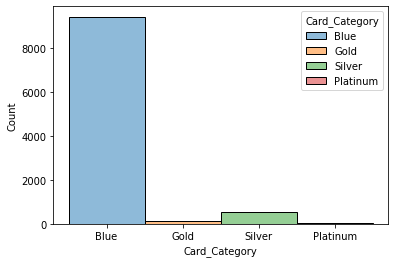

In [ ]:
sns.histplot(data = dataset, x = 'Card_Category', hue = 'Card_Category')

As we can see we have 4 categories: Blue, Silver, Gold, Platinum<br>
We can assume that the Blue category is the lest demanding category, and the Platinum is the most demanding. 

## Age

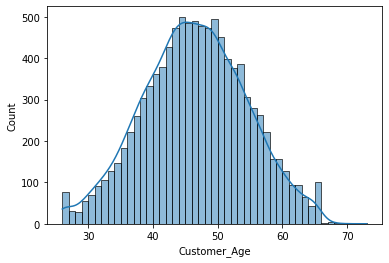

In [ ]:
sns.histplot(data = dataset, x = 'Customer_Age', kde=True)

In [ ]:
dataset['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

The histogram of the distribuition of age is realy simple, I don't have any comments.

## Gender

OBS: Here we have a problem that is: the dataset is set up only for two genders.<br>
We don't see any other gender that is not: Male or Female. The is no category for transgender or non-binary people to fit in. So, I will use this columns as a feature in the model, but keeping in mid that it is not complete as it should be.

In [ ]:
dataset['Customer_Gender'].describe()

count     10127
unique        2
top           F
freq       5358
Name: Customer_Gender, dtype: object

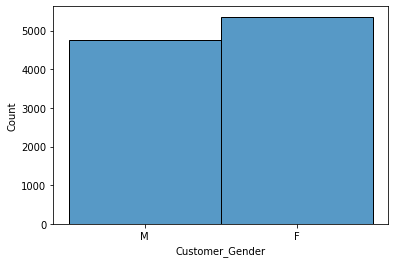

In [ ]:
sns.histplot(data = dataset, x = 'Customer_Gender')

## Marital Status

In [ ]:
dataset['Marital_Status'].describe()

count       10127
unique          4
top       Married
freq         4687
Name: Marital_Status, dtype: object

In [ ]:
dataset['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

We have some people that the marital status ins unknown. I will treat that like any other category in marial status. Because I don't feel like choosing a marital status for them. 

## Education Level

In [ ]:
dataset['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
dataset['Education_Level'].describe()

count        10127
unique           7
top       Graduate
freq          3128
Name: Education_Level, dtype: object

## Income Category

In [ ]:
dataset['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Now, we have a lot of cool things to explore on this dataset.<br>
Like: the difference of income per gender, or education lave. Or the credit limit per income, etc. But I will keep working on the kind of stuff on other notebook, here the foccus is on developing a KNN estimator to se if we can presume the card category a person should recieve.

# Cleaning and preparing the dataset





First we will se if ther is any null values on the dataset

In [ ]:
np.sum(dataset.isna())

Customer_Id                 0
Attrition_Flag              0
Customer_Age                0
Customer_Gender             0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

Luckly we havan't any NA values.

## Categorical Features

Now we need to treat the categorial features. <br>
For that I will use the OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### Gender

The gender category is easy to treat because we have only 2 categories. So I will just use 1 for male and 0 for female

In [ ]:
gender_map = {
    'M': 1,
    'F': 0
}

dataset['Customer_Gender'] = dataset['Customer_Gender'].map(gender_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


### Education Level

The education level is is a ordinal category, so I will assign to the 0 up to 6 according to the the education level. And assigning 0 to unknown

In [ ]:
education_level_map = {
        'Unknown'       : 0,
        'Uneducated'    : 1,
        'High School'   : 2,
        'College'       : 3,
        'Graduate'      : 4,
        'Post-Graduate' : 5,
        'Doctorate'     : 6
}

dataset['Education_Level'] = dataset['Education_Level'].map(education_level_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


### Incoming Category

The Incoming Category is also an ordinal feature. So we will rate it from 0 up to 6. Just like we did on the Education Level 

In [ ]:
incoming_category_map = {
    'Unknown'        : 0,
    'Less than $40K' : 1, 
    '$40K - $60K'    : 2,
    '$60K - $80K'    : 3,
    '$80K - $120K'   : 4,
    '$120K +'        : 5
}

dataset['Income_Category'] = dataset['Income_Category'].map(incoming_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,3,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,1,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,4,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,1,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,3,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


### Card Category

 Another ordinal categorical variable, we already know how to handle it.

In [ ]:
card_category_map = {
    'Blue'     : 1,
    'Silver'   : 2,
    'Gold'     : 3,
    'Platinum' : 4  
}

dataset['Card_Category'] = dataset['Card_Category'].map(card_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,3,1,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,1,1,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,4,1,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,1,1,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,3,1,21,5,1,0,4716.0,0,4716.0,816,28,0.000


### Marital Status

The marital status is diferent. We don't have an order, it is a nominal categorical variable. So we will use the OneHotEncoder to fit it into a numerical feature so we can use this on our model.

In [ ]:
ohe = OneHotEncoder()

ohe_transformed = pd.DataFrame(ohe.fit_transform(dataset[['Marital_Status']]).toarray())

dataset = dataset.join(ohe_transformed)

In [ ]:
dataset.rename(columns = {0: 'Marital_Status_0', 1: 'Marital_Status_1', 2: 'Marital_Status_2', 3: 'Marital_Status_3'}, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,768805383,Existing Customer,45,1,3,2,Married,3,1,39,...,12691.0,777,11914.0,1144,42,0.061,0.0,1.0,0.0,0.0
1,818770008,Existing Customer,49,0,5,4,Single,1,1,44,...,8256.0,864,7392.0,1291,33,0.105,0.0,0.0,1.0,0.0
2,713982108,Existing Customer,51,1,3,4,Married,4,1,36,...,3418.0,0,3418.0,1887,20,0.000,0.0,1.0,0.0,0.0
3,769911858,Existing Customer,40,0,4,2,Unknown,1,1,34,...,3313.0,2517,796.0,1171,20,0.760,0.0,0.0,0.0,1.0
4,709106358,Existing Customer,40,1,3,1,Married,3,1,21,...,4716.0,0,4716.0,816,28,0.000,0.0,1.0,0.0,0.0


### Attrition Flag

 This columns is to say if a customer had churned or not. Sice we want to categorize the customers in card categorys there is no reazon to we keep the clients that had churned. So we will ignore this column. In another project we will use this feature to develop a Decision Tree Estimator to estimate the chance of a client churn.

In [ ]:
dataset.query(" Attrition_Flag == 'Existing Customer'", inplace = True)

## Numerical Categories 

Now we will trate all the numerical categories with StandarEscaler 

In [ ]:
from sklearn.preprocessing import StandardScaler

To be more easy to read I wll do all the transformations in only one block. 

In [ ]:
scaler = StandardScaler().fit(dataset[['Customer_Age']])
dataset['Customer_Age'] = scaler.transform(dataset[['Customer_Age']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Dependent_Count']])
dataset['Dependent_Count'] = scaler.transform(dataset[['Dependent_Count']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Months_on_book']])
dataset['Months_on_book'] = scaler.transform(dataset[['Months_on_book']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Total_Relationship_Count']])
dataset['Total_Relationship_Count'] = scaler.transform(dataset[['Total_Relationship_Count']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Months_Inactive_12_mon']])
dataset['Months_Inactive_12_mon'] = scaler.transform(dataset[['Months_Inactive_12_mon']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Contacts_Count_12_mon']])
dataset['Contacts_Count_12_mon'] = scaler.transform(dataset[['Contacts_Count_12_mon']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Credit_Limit']])
dataset['Credit_Limit'] = scaler.transform(dataset[['Credit_Limit']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Total_Revolving_Bal']])
dataset['Total_Revolving_Bal'] = scaler.transform(dataset[['Total_Revolving_Bal']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Avg_Open_To_Buy']])
dataset['Avg_Open_To_Buy'] = scaler.transform(dataset[['Avg_Open_To_Buy']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Total_Trans_Amt']])
dataset['Total_Trans_Amt'] = scaler.transform(dataset[['Total_Trans_Amt']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Total_Trans_Ct']])
dataset['Total_Trans_Ct'] = scaler.transform(dataset[['Total_Trans_Ct']])

In [ ]:
scaler = StandardScaler().fit(dataset[['Avg_Utilization_Ratio']])
dataset['Avg_Utilization_Ratio'] = scaler.transform(dataset[['Avg_Utilization_Ratio']])

# KNN Estimator

Now we had our dataset prepared. We can start to develop our KNN estimator. First we will drop the columns we are not using: Customer_Id, Attrition_Flag and Marital_Status. Them we will separete our features columns from the target column (Card_Category), and after that we will split for train and test. 

In [ ]:
features_list = ['Customer_Age',                
                 'Customer_Gender',             
                 'Dependent_Count',            
                 'Education_Level',            
                 'Marital_Status_0',
                 'Marital_Status_1',
                 'Marital_Status_2',
                 'Marital_Status_3',         
                 'Income_Category',            
                 'Months_on_book',             
                 'Total_Relationship_Count',   
                 'Months_Inactive_12_mon',     
                 'Contacts_Count_12_mon',      
                 'Credit_Limit',               
                 'Total_Revolving_Bal',        
                 'Avg_Open_To_Buy',            
                 'Total_Trans_Amt',            
                 'Total_Trans_Ct',             
                 'Avg_Utilization_Ratio']      
            
features = dataset[features_list]
features.head()

,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,-0.156190,1,0.509985,2,0.0,1.0,0.0,0.0,3,0.388889,0.709949,-1.252865,0.595213,0.436364,-0.632973,0.489013,-0.999456,-1.163844,-0.863732
1,0.338818,0,2.044726,4,0.0,0.0,1.0,0.0,1,1.012227,1.364031,-1.252865,-0.329538,-0.051833,-0.518152,-0.008614,-0.957606,-1.556554,-0.702295
2,0.586322,1,0.509985,4,0.0,1.0,0.0,0.0,4,0.014887,0.055866,-1.252865,-2.179040,-0.584393,-1.658444,-0.445935,-0.787930,-2.123802,-1.087543
3,-0.774949,0,1.277356,2,0.0,0.0,0.0,1.0,1,-0.234448,-0.598216,1.697912,-1.254289,-0.595951,1.663448,-0.734475,-0.991770,-2.123802,1.700918
4,-0.774949,1,0.509985,1,0.0,1.0,0.0,0.0,3,-1.855126,0.709949,-1.252865,-2.179040,-0.441511,-1.658444,-0.303096,-1.092835,-1.774727,-1.087543


In [ ]:
target = dataset['Card_Category']

Now we are doing the train/test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target)

Once we had the train/test split we need to find the best K to set the number of neighbors for the KNN estimator. I will test 30 values of K. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

final_score = []
best_score = 0
best_k = 0

for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train)

  mScore = np.mean(scores)
  final_score.append(mScore)

  print('K:', k)
  print('Score:', mScore)

  if mScore > best_score:
    best_score = mScore
    best_k = k

  print('Best score: ', best_score)
  print('Best K: ', best_k)

K Atual: 1
Score: 0.923235294117647
Melhor score:  0.923235294117647
Melhor K:  1
K Atual: 2
Score: 0.9347058823529413
Melhor score:  0.9347058823529413
Melhor K:  2
K Atual: 3
Score: 0.9338235294117647
Melhor score:  0.9347058823529413
Melhor K:  2
K Atual: 4
Score: 0.9352941176470587
Melhor score:  0.9352941176470587
Melhor K:  4
K Atual: 5
Score: 0.9330882352941178
Melhor score:  0.9352941176470587
Melhor K:  4
K Atual: 6
Score: 0.9344117647058823
Melhor score:  0.9352941176470587
Melhor K:  4
K Atual: 7
Score: 0.9354411764705883
Melhor score:  0.9354411764705883
Melhor K:  7
K Atual: 8
Score: 0.9336764705882352
Melhor score:  0.9354411764705883
Melhor K:  7
K Atual: 9
Score: 0.9344117647058823
Melhor score:  0.9354411764705883
Melhor K:  7
K Atual: 10
Score: 0.933235294117647
Melhor score:  0.9354411764705883
Melhor K:  7
K Atual: 11
Score: 0.9335294117647059
Melhor score:  0.9354411764705883
Melhor K:  7
K Atual: 12
Score: 0.9335294117647059
Melhor score:  0.9354411764705883
Melho

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


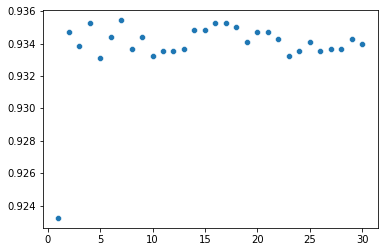

In [ ]:
sns.scatterplot(range(1,31), final_score)

As we can see the best K is 7. So we will fit our model to 7-Nearest Neighors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

KNeighborsClassifier(n_neighbors=7)

# Accuracy

Now I will use the accuracy_score to se how accurate our model is. 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, pred)
print(f'The accuracy of the model is: {round(acc,2)*100}%')

The accuracy of the model is: 94.0%


We got a hight accuracy with the KNN classifier, as we intended to do! 

# Overviewing

Now I want to see how the model did classified our test group and how the group was actually classified.

In [120]:
test_pred = pd.DataFrame(pred) # model predicted data
test_y_real = pd.DataFrame(y_test) #real data

test_pred.rename(columns = {0: 'Card_Category'}, inplace = True)
test_y_real.rename(columns = {0: 'Card_Category'}, inplace = True)

I will set back the name of the categorys, so we can se it more clearly

In [122]:
card_category_map = {
    1: 'Blue',
    2: 'Silver',
    3: 'Gold',
    4: 'Platinum' 
}

test_pred['Card_Category'] = test_pred['Card_Category'].map(card_category_map)
test_y_real['Card_Category'] = test_y_real['Card_Category'].map(card_category_map)

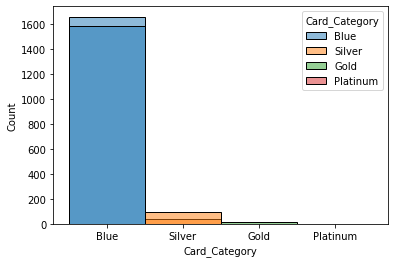

In [125]:
sns.histplot(data = test_pred, x = 'Card_Category', hue = 'Card_Category')
sns.histplot(data = test_y_real, x = 'Card_Category', hue = 'Card_Category')

So, we can compare how the model set the clients into the cateogries and how they should be categorized.

# Thank you! 